In [1]:
import pandas as pd
import numpy as np
import math
import zipfile
from PIL import Image
from tqdm import tqdm
import pickle
import cv2
import matplotlib.pyplot as plt
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
labels= pd.read_csv('/content/drive/MyDrive/Projeto ML/2022/Aprendizado de Maquinas/Projeto/CelebA/identity_CelebA.txt', header=None)

In [4]:
labels.rename(columns={0:'id'},inplace=True)

In [5]:
labels['class'] = labels['id'].apply(lambda x:x.split()[1])
labels['class'] = labels['class'].astype(int)
labels['image'] = labels['id'].apply(lambda x:x.split()[0])

In [6]:
labels.drop(columns='id', inplace=True)

In [7]:
print('Numero de classes distintas:', len(labels['class'].unique()))
print('Numero de instâncias na base:', labels.shape[0])

Numero de classes distintas: 10177
Numero de instâncias na base: 202599


In [8]:
keep_class = labels['class'].value_counts().cumsum()
final_list = keep_class[:(keep_class <= math.ceil(labels.shape[0]*.3)).sum() + 1].index
subselect = labels[labels['class'].isin(final_list)]

In [9]:
keep_images = subselect['image'].values.tolist()

In [10]:
print('Imagens selecionadas:', subselect.shape)

Imagens selecionadas: (60788, 2)


In [11]:
imagens_path = '/content/drive/MyDrive/Projeto ML/2022/Aprendizado de Maquinas/Projeto/CelebA/img_align_celeba.zip'

In [15]:
imgzip = zipfile.ZipFile(imagens_path)
inflist = imgzip.infolist()
all_images = {}

# Testando com imagens da classe 3

for f in tqdm(inflist):
  file_name = f.filename.split('/')[1]
  if file_name in keep_images:
      ifile = imgzip.open(f)
      img = Image.open(ifile)
      all_images[file_name] = img
      # print(img)
      # display(img)
      break
      
# with open('dataset.obj', 'wb') as fp:
#   pickle.dump(all_images, fp)

  0%|          | 1/202600 [00:00<1:53:08, 29.85it/s]


In [13]:
def viola_jones(original_image, show=False):

  face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") #Note the change

  img = cv2.cvtColor(np.array(original_image), cv2.COLOR_RGB2BGR)
  gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  faces=face_cascade.detectMultiScale(gray_img, scaleFactor=1.05,minNeighbors=5)

  for x, y, w, h in faces:
    cropped_img = gray_img[y:y+h, x:x+w]
    break
    
  if show:
    img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
    resized=cv2.resize(img,(int(img.shape[1]/3), int(img.shape[0]/3))) 

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

  return cropped_img

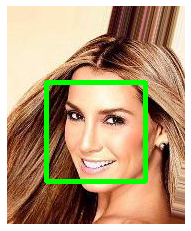

In [17]:
test_image=  all_images['000001.jpg']
viola_jones(test_image, show=True);

In [ ]:
imgzip = zipfile.ZipFile(imagens_path)
inflist = imgzip.infolist()
all_images = {}

# Testando com imagens da classe 3

for f in tqdm(inflist):
  file_name = f.filename.split('/')[1]
  if file_name in keep_images:
      ifile = imgzip.open(f)
      img = Image.open(ifile)
      
      try:
        cropped = viola_jones(img)
        all_images[file_name] = (cropped, 1)
      except:
        all_images[file_name] = (img, 0)

      # print(img)
      # display(img)
      
with open('dataset_VJ.obj', 'wb') as fp:
  pickle.dump(all_images, fp)

  0%|          | 669/202600 [00:12<1:38:34, 34.14it/s]